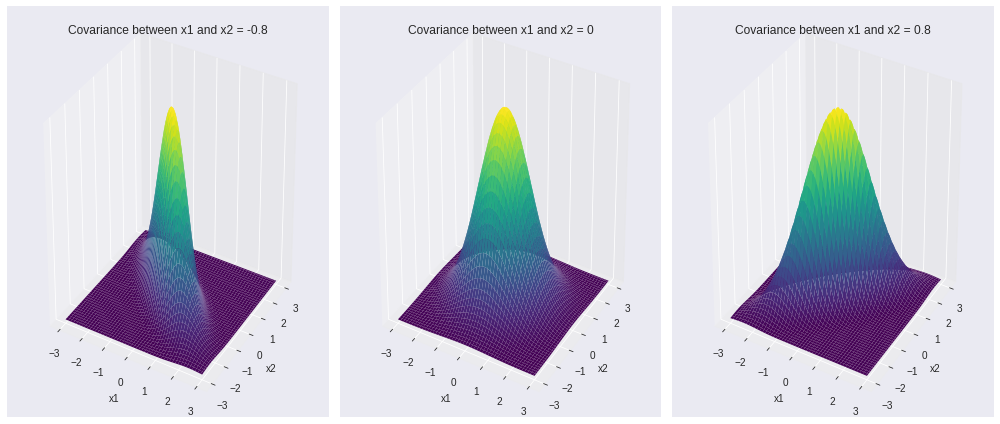

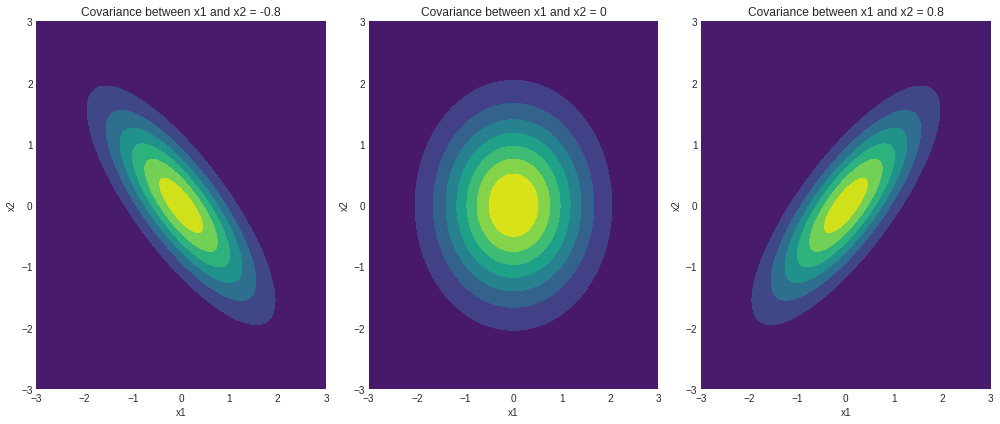

In [ ]:
# Importing the necessary modules
import numpy as np
import jax.numpy as jnp
import jax.scipy as jsp
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal



plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distribution
# to be at (0,0)
mean = jnp.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
	
	# Initializing the covariance matrix
	cov = jnp.array([[1, val], [val, 1]])
	
	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)
	
	# Generating a meshgrid complacent with
	# the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	
	x = jnp.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = jnp.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = jnp.meshgrid(x,y)
	
	# Generating the density function
	# for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	
	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()


Resources


*   https://www.youtube.com/watch?v=SstuvS-tVc0&list=PLBoQnSflObckOARbMK9Lt98Id0AKcZurq&index=1
*   https://roberttlange.github.io/posts/2020/03/blog-post-10/

